In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score

%matplotlib inline

In [2]:
IN_DIR = r'E:\hacks-ai\2022.10.Новосибирская область\in'

In [86]:
#df_train = pd.read_csv("/content/train.csv")

df_train = pd.read_csv(IN_DIR + "\\train_dataset_train.csv")

## Рассмотрим датасет по ближе

In [4]:
df_train.shape

(4222094, 6)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222094 entries, 0 to 4222093
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   Easting      float64
 2   Northing     float64
 3   Height       float64
 4   Reflectance  float64
 5   Class        int64  
dtypes: float64(4), int64(2)
memory usage: 193.3 MB


# Пояснение к данным
## Столбец «Class» хранит в себе тип класса точки, где:
### 0 – точки земли
### 1 – точки опор
### 3 – точки растительности
### 4 – точки рельсов
### 5 – точки элементов контактной сети
### 64 – точки шумов

In [40]:
# Коды классов для именования подмножеств данных
class_dict = {
    'ground': 0,
    'support': 1,
    'green': 3,
    'rails': 4,
    'wires': 5,
    'noise': 64
}

Пострим на распределение данных

Text(0.5, 1.0, 'Распределение класса точки')

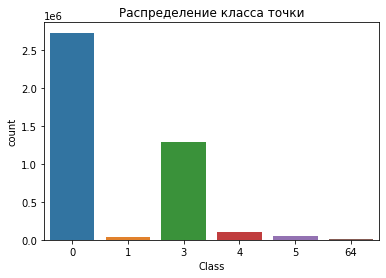

In [6]:
sns.countplot(x = "Class" , data  = df_train).set_title('Распределение класса точки')

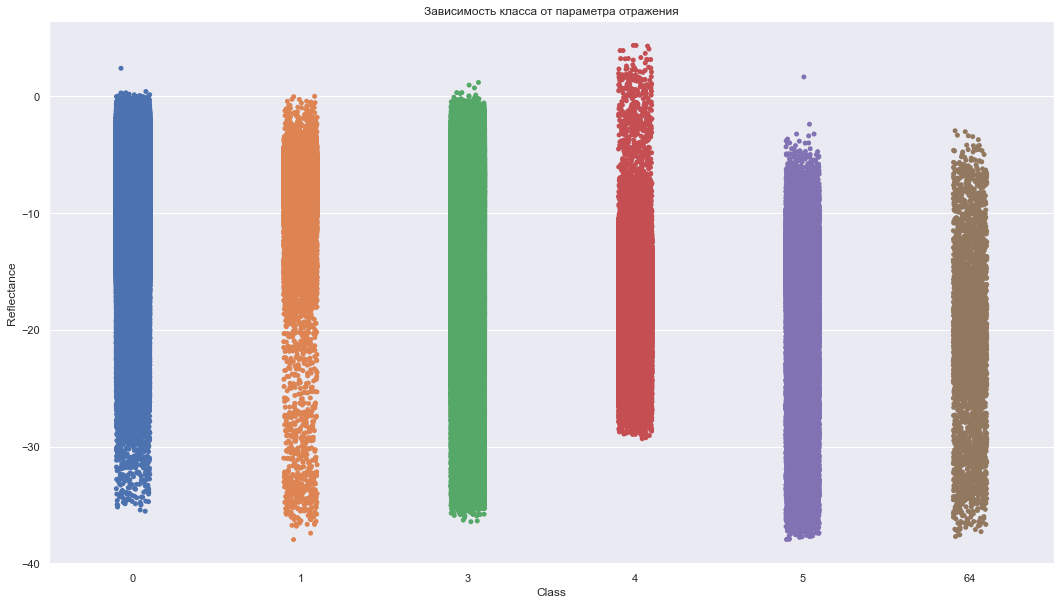

In [17]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Reflectance").set_title('Зависимость класса от параметра отражения');

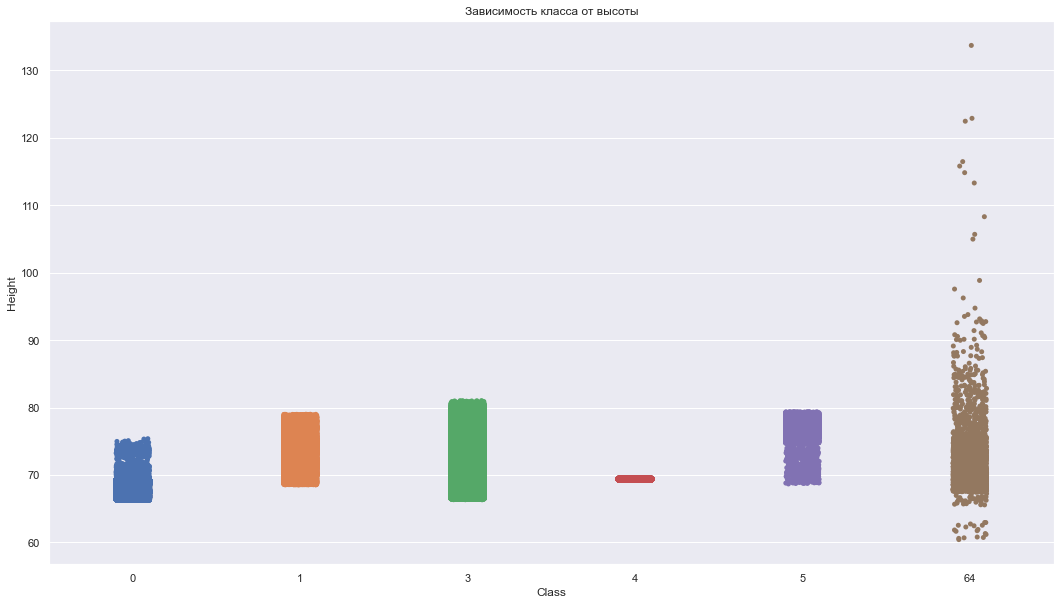

In [30]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Height").set_title('Зависимость класса от высоты');

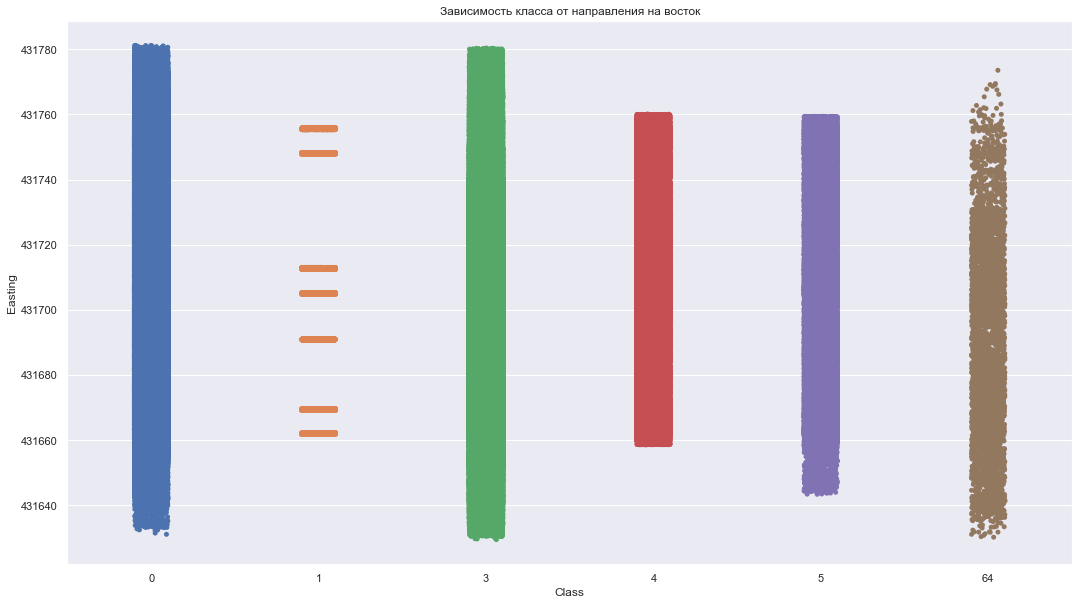

In [32]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Easting").set_title('Зависимость класса от направления на восток');

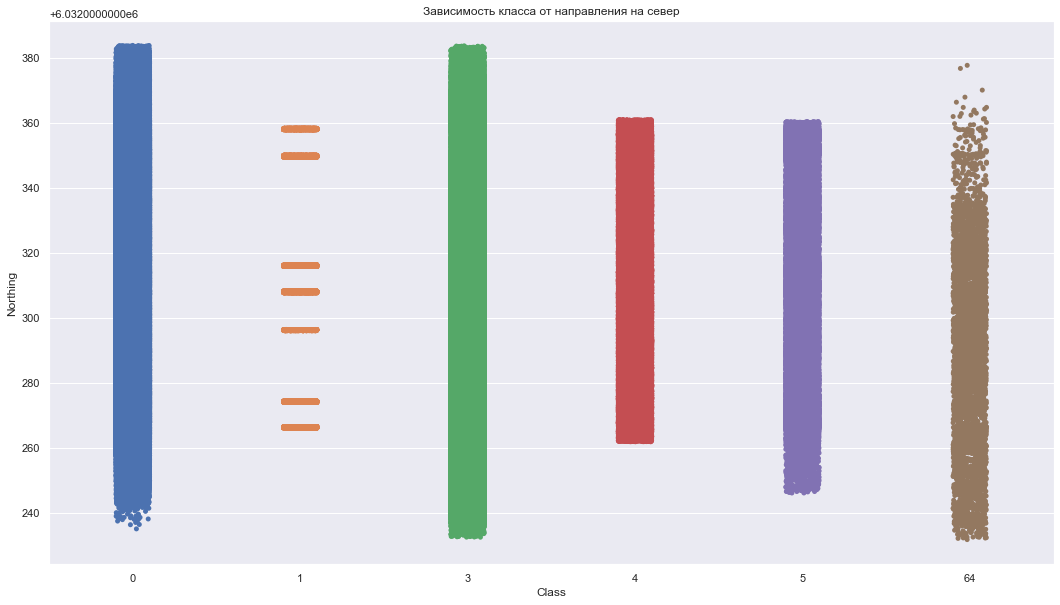

In [31]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Northing").set_title('Зависимость класса от направления на север');

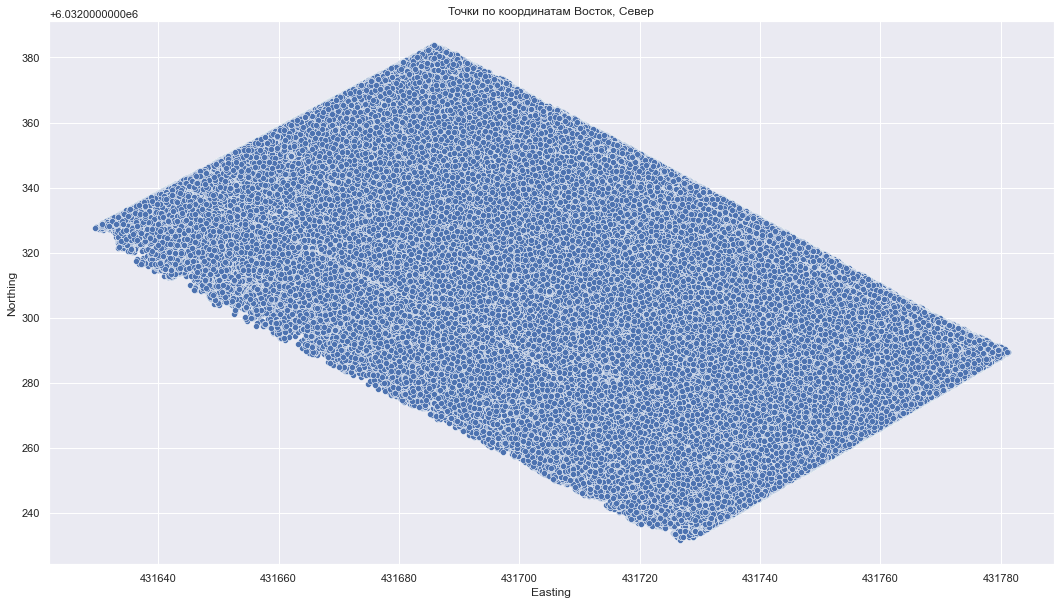

In [34]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_train, x= "Easting", y = "Northing").set_title('Точки по координатам Восток, Север');

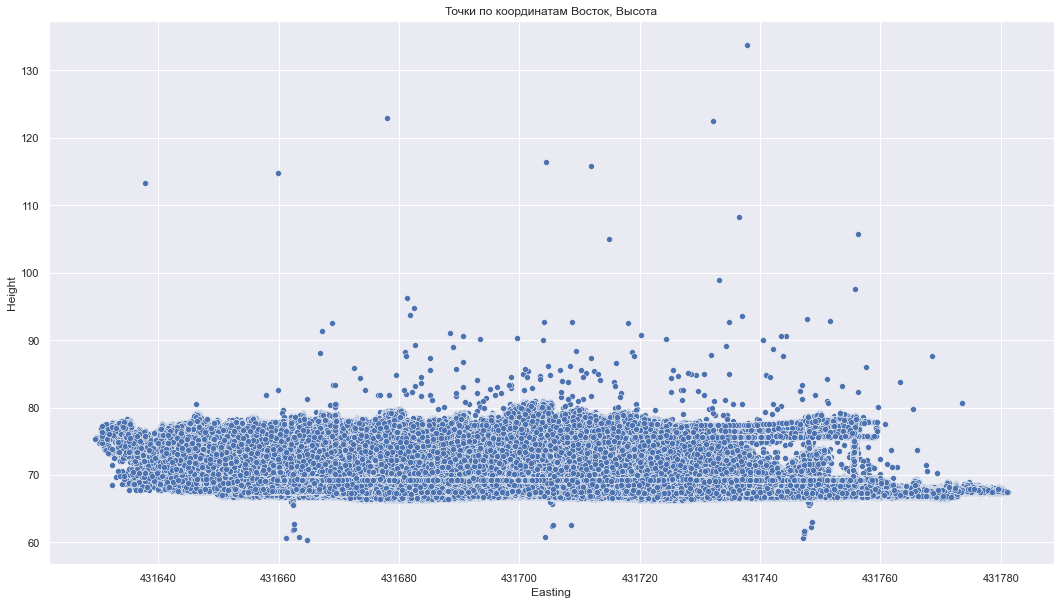

In [35]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_train, x= "Easting", y = "Height").set_title('Точки по координатам Восток, Высота');

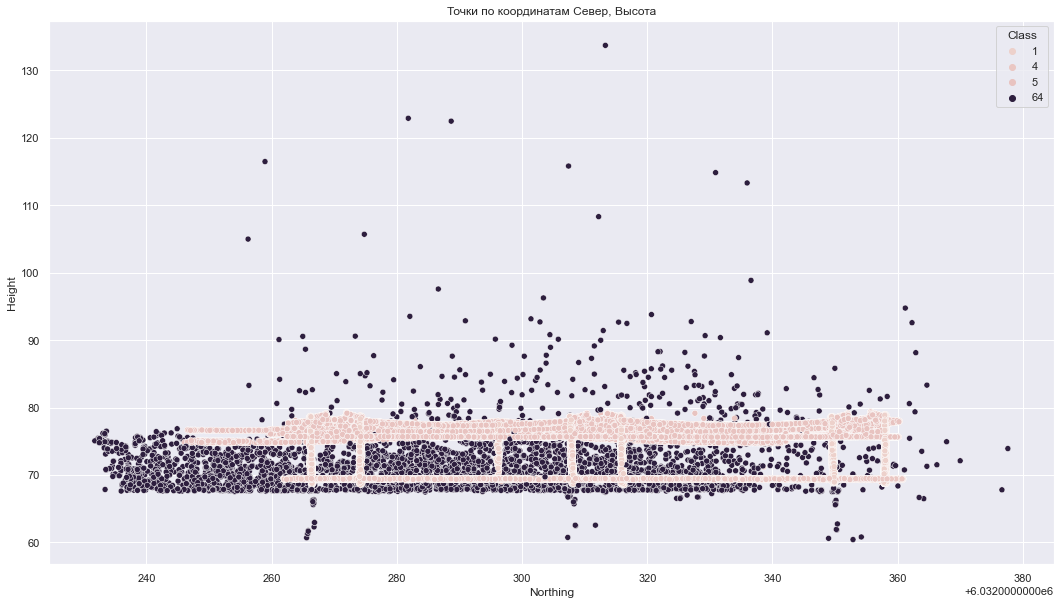

In [58]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_train[~df_train['Class'].isin([0,3])], x= "Northing", y = "Height", hue="Class").set_title('Точки по координатам Север, Высота');

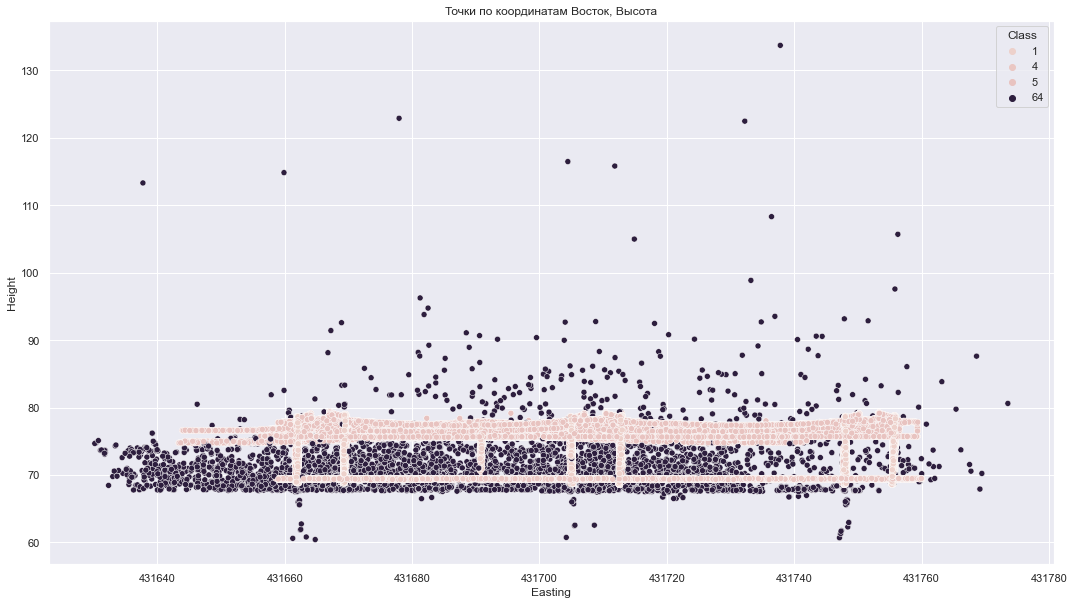

In [59]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_train[~df_train['Class'].isin([0,3])], x= "Easting", y = "Height", hue="Class").set_title('Точки по координатам Восток, Высота');

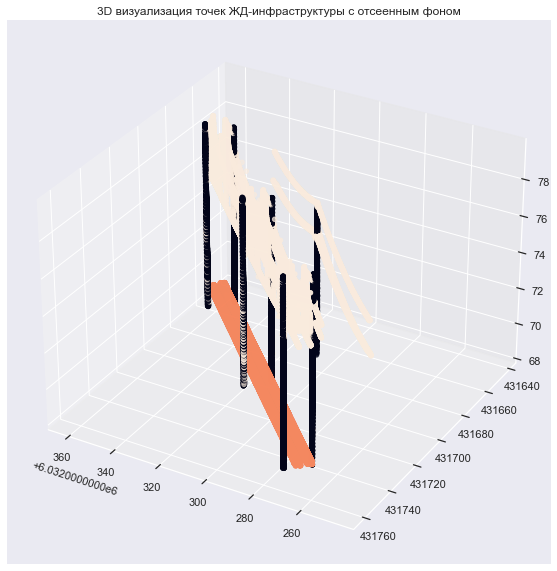

In [69]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

data_3d = df_train[~df_train['Class'].isin([0, 3, 64])]

ax.scatter(data_3d['Northing'], data_3d['Easting'], data_3d['Height'], c=data_3d['Class'])

plt.title('3D визуализация точек ЖД-инфраструктуры с отсеенным фоном')

ax.view_init(30, 120)

plt.show()

In [53]:
df_train.groupby(['Class']).count()

,id,Easting,Northing,Height,Reflectance
Class,,,,,
0,2731040,2731040,2731040,2731040,2731040
1,39384,39384,39384,39384,39384
3,1287816,1287816,1287816,1287816,1287816
4,103453,103453,103453,103453,103453
5,55985,55985,55985,55985,55985
64,4416,4416,4416,4416,4416


In [57]:
df_train[~df_train['Class'].isin([0,3])]

,id,Easting,Northing,Height,Reflectance,Class
7,3326167,431747.8350,6.032272e+06,69.4981,-20.24,4
17,5048214,431746.6556,6.032272e+06,77.4229,-30.56,5
19,2251178,431676.2245,6.032345e+06,69.3043,-12.07,4
37,3785386,431685.7229,6.032331e+06,77.3064,-16.96,5
44,2391273,431699.7740,6.032318e+06,77.6741,-28.57,5
...,...,...,...,...,...,...
4221986,2478591,431725.3512,6.032294e+06,69.4672,-22.02,4
4222003,1203740,431730.2666,6.032288e+06,75.6578,-13.44,5
4222008,2620903,431715.3661,6.032301e+06,69.3684,-15.00,4
4222018,541166,431755.3812,6.032274e+06,69.7756,-5.67,1


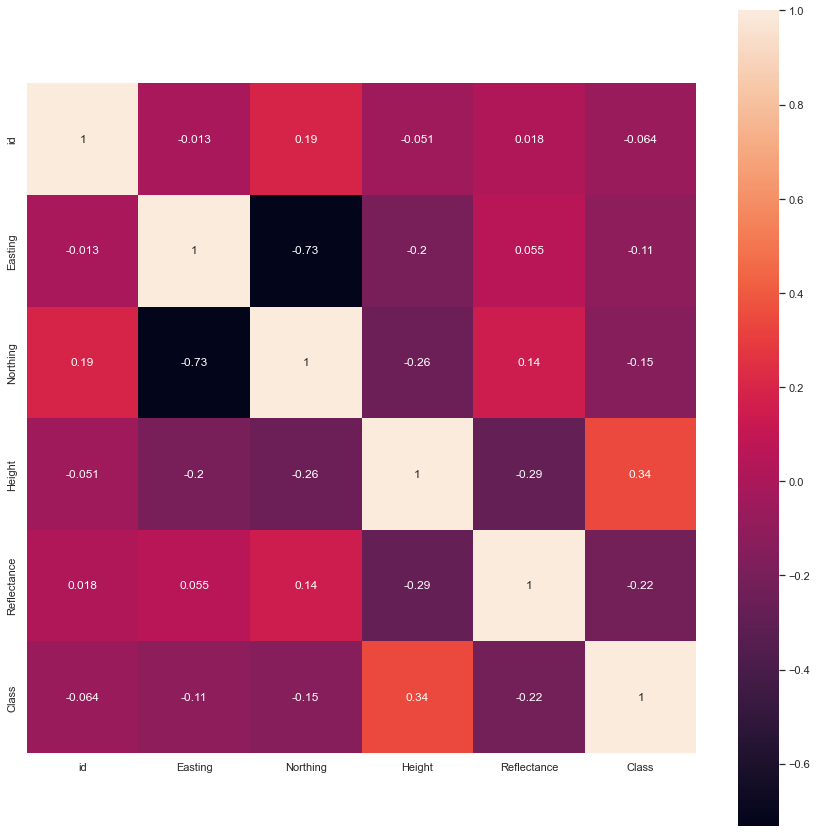

In [18]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.corr(), square = True, annot=True)

## Выделим выборки

In [6]:
df_train = df_train.fillna(0)

In [7]:
X = df_train.drop(["Class", "id"], axis = 1)
y = df_train[["Class"]]

In [8]:
X.shape

(4222094, 4)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
y_train

,Class
408665,0
1215009,3
568376,0
33256,3
2742206,3
...,...
4044887,0
1136074,3
1570006,3
2234489,0


## Обучение модели

In [24]:
clf = RandomForestClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

## Оценка точности

In [ ]:
pred = clf.predict(X_test)

In [ ]:
y_test.head(3)

In [ ]:
result = recall_score(y_test, pred, average='macro', zero_division=True)

print("Recall score",result)

In [11]:
df_test = pd.read_csv(IN_DIR + "\\test_dataset_test.csv")

In [12]:
df_test.shape

(1809469, 5)

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809469 entries, 0 to 1809468
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   Easting      float64
 2   Northing     float64
 3   Height       float64
 4   Reflectance  float64
dtypes: float64(4), int64(1)
memory usage: 69.0 MB


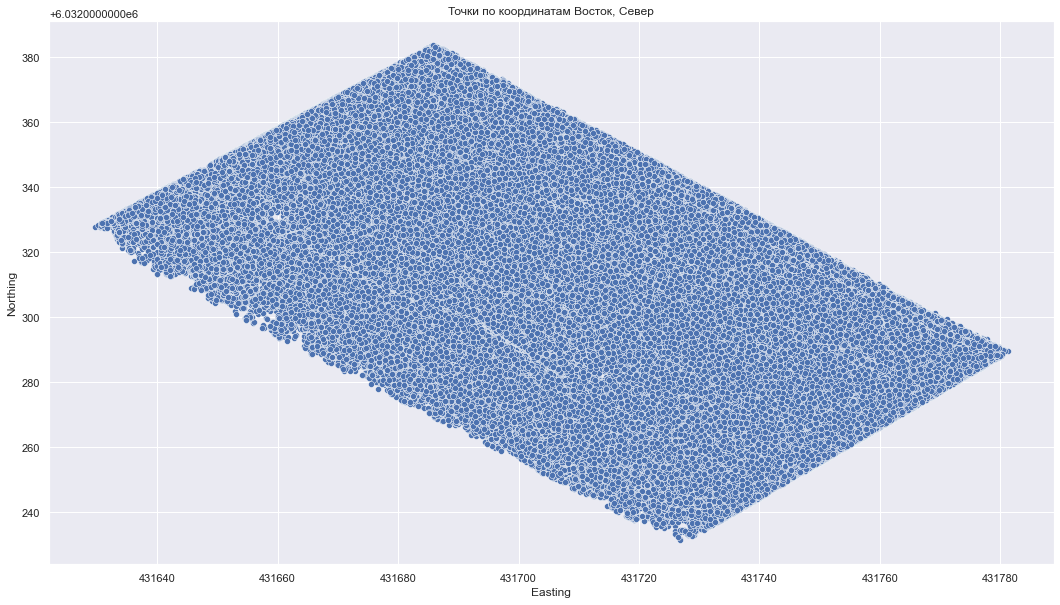

In [43]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_test, x= "Easting", y = "Northing").set_title('Точки по координатам Восток, Север');

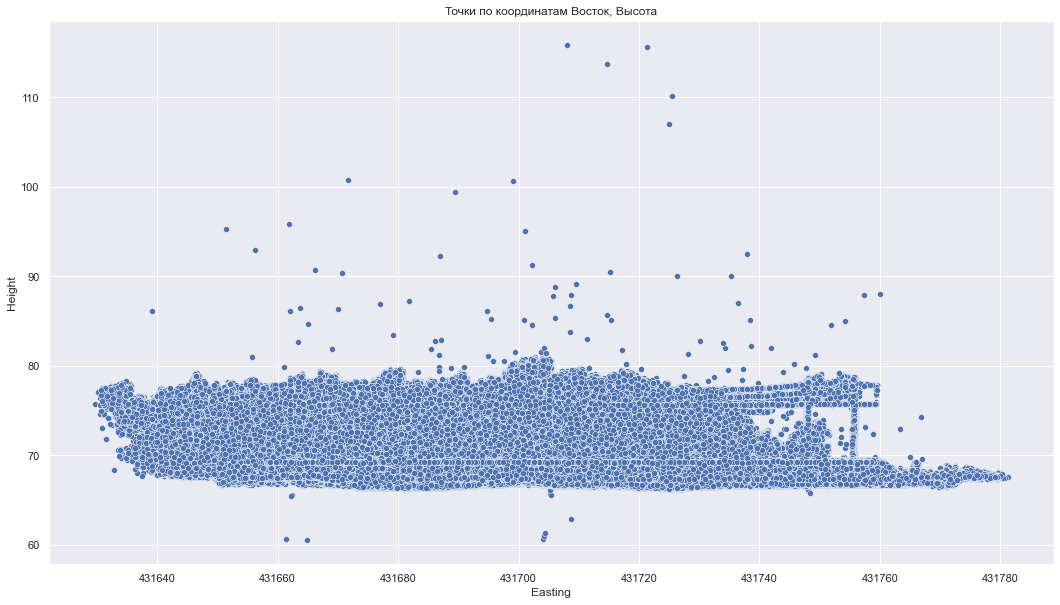

In [44]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_test, x= "Easting", y = "Height").set_title('Точки по координатам Восток, Высота');

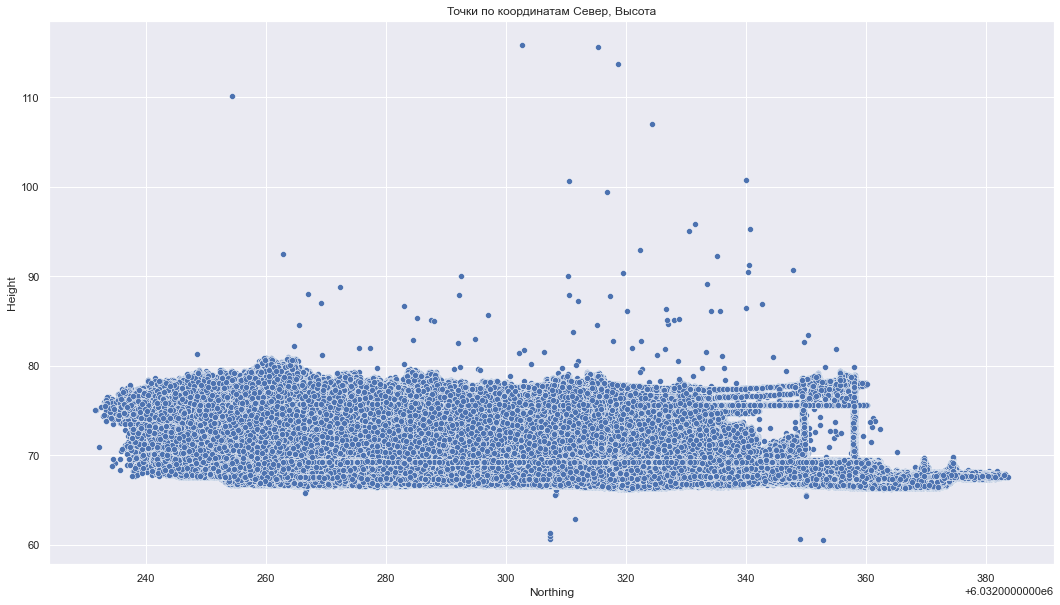

In [45]:
sns.set(rc={'figure.figsize':(18,10)})
sns.scatterplot(data = df_test, x= "Northing", y = "Height").set_title('Точки по координатам Север, Высота');

# Метод KDE (kernel density estimation) оценки распределения точек и их классов

## 1. Выделение точек классов
### 1.1 Приоритетными считаются точки рельсов, опор и элементов контактной сети (значения "Class": 4, 1, 5)
### 1.2 Фон изображения: земля и растительность ("Class": 0, 3) и шумы ("Class": 64) возможно даже имеет смысл отфильтровывать для работы только с информативным сигналом.

## 2. Получение KDE отдельно для классов.
### 2.1 Выделение подмножеств данных для каждого класса (возможно самый многочисленный для земли можно пропустить).
### 2.2 Определение KDE для отдельного класса.
### 2.3 Оценка min и max значений ядерной плотности класса. Min будет использован для порогового значения (threshold) при определении класса.

## 3. Получение предсказаний классов для тестовых точек. Оценка точности предсказания.

In [49]:
# Для смещения координат в 0. Меньше обрабатываемые числа - экономия памяти и ресурсов процессора.
dict_min = {col: df_train[col].min() for col in ['Easting', 'Northing', 'Height', 'Reflectance']}
dict_min

{'Easting': 431629.442,
 'Northing': 6032231.7455,
 'Height': 60.4144,
 'Reflectance': -37.96}

In [87]:
# Конвертация - сдвига к нулю для уменьшения обрабатываемых чисел
df_train_conv = df_train.copy()

# TODO: возможно поворот, чтобы данные были похожи на прямоугольник, улучшит точность

for col in dict_min.keys():
    df_train_conv[col] = df_train_conv[col] - dict_min[col]

df_train_conv.describe()

,id,Easting,Northing,Height,Reflectance,Class
count,4.222094e+06,4.222094e+06,4.222094e+06,4.222094e+06,4.222094e+06,4.222094e+06
mean,3.016931e+06,7.733064e+01,7.598867e+01,8.987192e+00,2.742937e+01,1.155633e+00
std,1.741258e+06,2.977279e+01,2.981495e+01,2.269884e+00,4.515277e+00,2.535087e+00
min,1.206000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.509238e+06,5.307290e+01,5.188342e+01,7.376300e+00,2.533000e+01,0.000000e+00
50%,3.016603e+06,7.742760e+01,7.552180e+01,8.790500e+00,2.802000e+01,0.000000e+00
75%,4.525054e+06,1.013164e+02,1.003989e+02,8.885000e+00,3.023000e+01,3.000000e+00
max,6.032767e+06,1.517292e+02,1.519835e+02,7.330410e+01,4.232000e+01,6.400000e+01


In [102]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

"""
Возвращает объект KDE для поданных на вход точек
"""
def get_kde(points_list, var_type='ccc', bw='normal_reference'):
    dens_u = sm.nonparametric.KDEMultivariate(data=points_list, var_type=var_type, bw=bw)
    pdf_points = ''

    return dens_u

"""
Вычисляет значения плотности точек PDF для поданных на вход точек и их PDF
"""
def get_pdf_points(dens_u, points_list):
    pdf_col = []
    for point in points_list:
        pdf_col.append(np.log10(dens_u.pdf(data_predict=point)))
        
    return pdf_col

In [105]:
points_list = df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]),
                              ['Easting', 'Northing', 'Height']].to_numpy().tolist()

dens_u = get_kde(points_list)

In [113]:
len(points_list)

103453

In [119]:
points_list[:10]

[[118.39300000004005, 40.36109999939799, 9.083699999999993],
 [46.78250000003027, 113.60089999996126, 8.889899999999997],
 [31.10630000004312, 123.111099999398, 8.925600000000003],
 [95.50560000003316, 66.43640000000596, 9.019199999999998],
 [85.67990000004647, 78.16749999951571, 8.951300000000003],
 [50.02630000002682, 106.82019999995828, 9.0659],
 [76.54899999999907, 78.76159999985248, 9.0522],
 [105.82339999999385, 56.38150000013411, 9.037700000000001],
 [45.78120000002673, 114.74069999996573, 9.003],
 [64.85460000002058, 98.38559999968857, 9.015]]

In [115]:
pdf_list = get_pdf_points(dens_u, points_list)

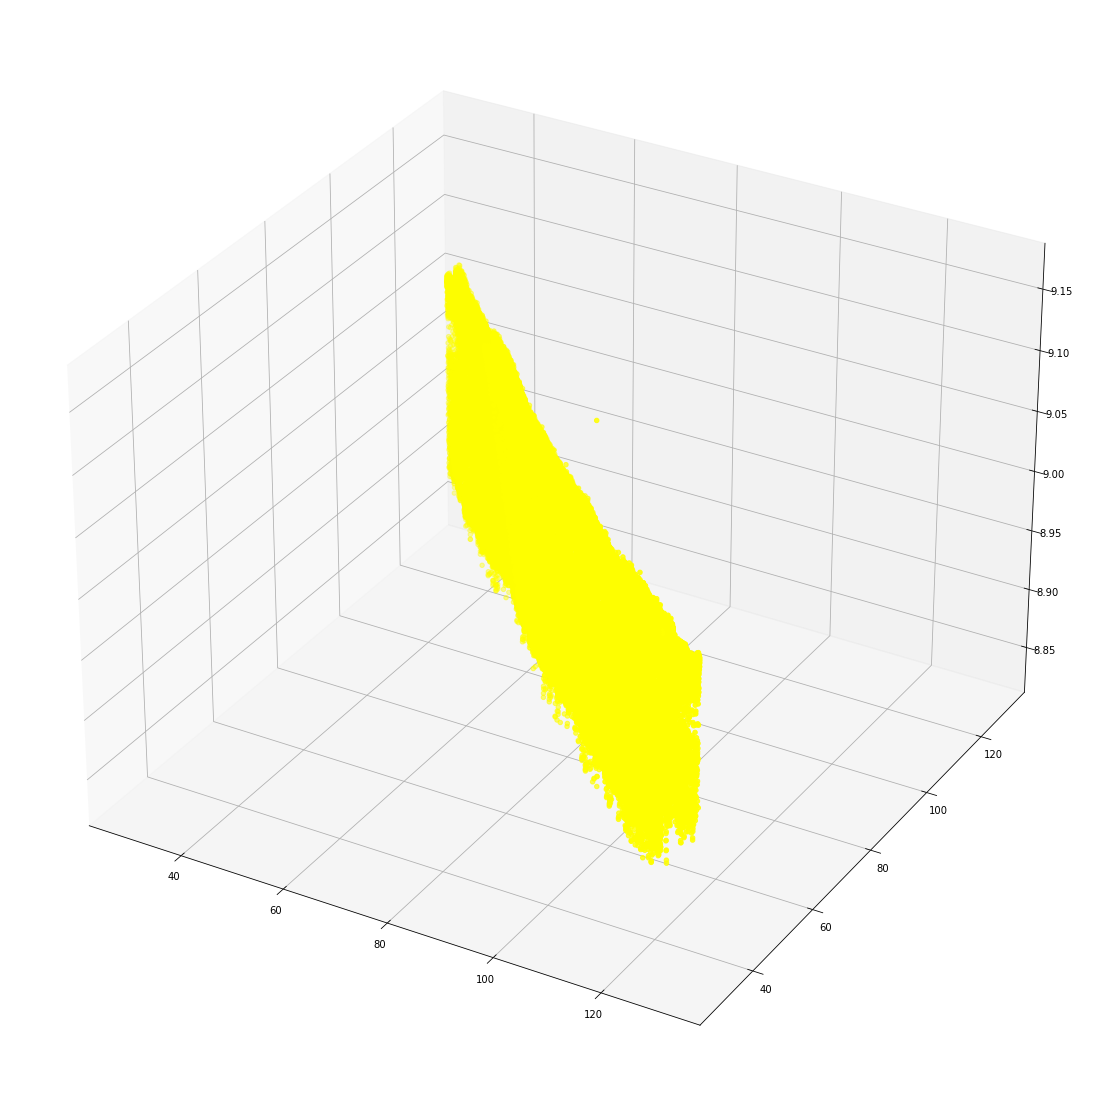

In [123]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(projection='3d')
ax.scatter(df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]), ['Easting']],
           df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]), ['Northing']],
           #df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]), ['Height']],
           df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]), ['Height']],
           pdf_list,
           c='yellow')

plt.show()

In [126]:
min(pdf_list), max(pdf_list)

(-5.797496470459777, -2.2955321384310876)

In [99]:
df_train_conv.loc[df_train_conv['Class'].isin([class_dict['rails']]), ['Easting', 'Northing', 'Height']]

,Easting,Northing,Height
7,118.3930,40.3611,9.0837
19,46.7825,113.6009,8.8899
111,31.1063,123.1111,8.9256
156,95.5056,66.4364,9.0192
230,85.6799,78.1675,8.9513
...,...,...,...
4221880,47.4748,107.2230,8.9198
4221938,97.7869,58.1621,8.9781
4221986,95.9092,62.1120,9.0528
4222008,85.9241,69.5062,8.9540
